### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [141]:
#your code here
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_style('darkgrid')

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [142]:
#your code here
rating_df = pd.read_csv('Data.csv')
user_df = pd.read_csv('user.csv')
movie_df = pd.read_csv('item.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

## Rating inspection

In [143]:
#your code here

rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [144]:
rating_df.shape

(100000, 4)

In [145]:
rating_df.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [146]:
rating_df.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [147]:
rating_df.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [148]:
rating_df.timestamp.sort_values().apply(lambda x: datetime.fromtimestamp(x))

214     1997-09-20 11:05:10
83965   1997-09-20 11:05:27
43027   1997-09-20 11:05:54
21396   1997-09-20 11:06:21
82655   1997-09-20 11:07:23
                ...        
46773   1998-04-23 07:10:38
73008   1998-04-23 07:10:38
46574   1998-04-23 07:10:38
64312   1998-04-23 07:10:38
79208   1998-04-23 07:10:38
Name: timestamp, Length: 100000, dtype: datetime64[ns]

<font color='blue'>
<h3>Observations</h3>

* The ratings dataset has 100,000 rows with 4 columns: user id, movie id, rating and timestamp, each of type: int64
* The timestamp column seems to be in the Unix timestamp format ranging from 4-Dec-1997 to 23-Apr-1998
* Ratings range from 1 (min) to 5 (max) with a mean of 3.53 and a median of 4 (meaning the distribution is left skewed)
* There are no null values in this dataset

## User inspection

In [149]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [150]:
user_df.shape

(943, 5)

In [151]:
user_df.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [152]:
user_df.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [153]:
user_df.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [154]:
user_df.gender.value_counts()

M    670
F    273
Name: gender, dtype: int64

In [155]:
user_df.occupation.nunique()

21

In [156]:
user_df.occupation.unique()


array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

<font color='blue'>
<h3>Observations</h3>

* The user dataset has 943 rows with 5 columns (type in brackets): user id (int), age (int), gender (object), occupation (object) and zip code (object)
* gender is a categorical variable with two possible values: M or F
* occupation is another categorical variable with 21 possible values
* There are no null values in this dataset
* age has a mean of 34.05 and a median of 31.00 (right skewed distribution) and ranges from a min of 7 to a max of 73

## Movie inspection

In [157]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [158]:
movie_df.shape

(1681, 22)

In [159]:
movie_df.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [160]:
movie_df.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [162]:
movie_df.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [163]:
movie_df['movie id'].nunique()  == movie_df.shape[0]

True

In [164]:
movie_df

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<font color='blue'>
<h3>Observations</h3>

* The movie dataset has 1681 rows with 22 columns (including index which I later set as index for convenience) 
* The columns movie title and release date are of type object (string) and the others (movie id and 19 genres) are of type int
* There are no null values in this dataset


### 4. Find the number of movies per genre using the item data - 2.5 marks

In [167]:
#your code here
# we filter the movie_df to the genre columns only and then sum with axis=0 for sum along the index
# Then we sort this in descending order to print a list of most to least popular genres (as measured by no of films released in that genre)
sums_by_genre = movie_df.iloc[:,3:].sum(axis=0)
sums_by_genre.sort_values(ascending=False)


Drama          725
Comedy         505
Action         251
Thriller       251
Romance        247
Adventure      135
Childrens      122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
unknown          1
dtype: int64

<AxesSubplot:>

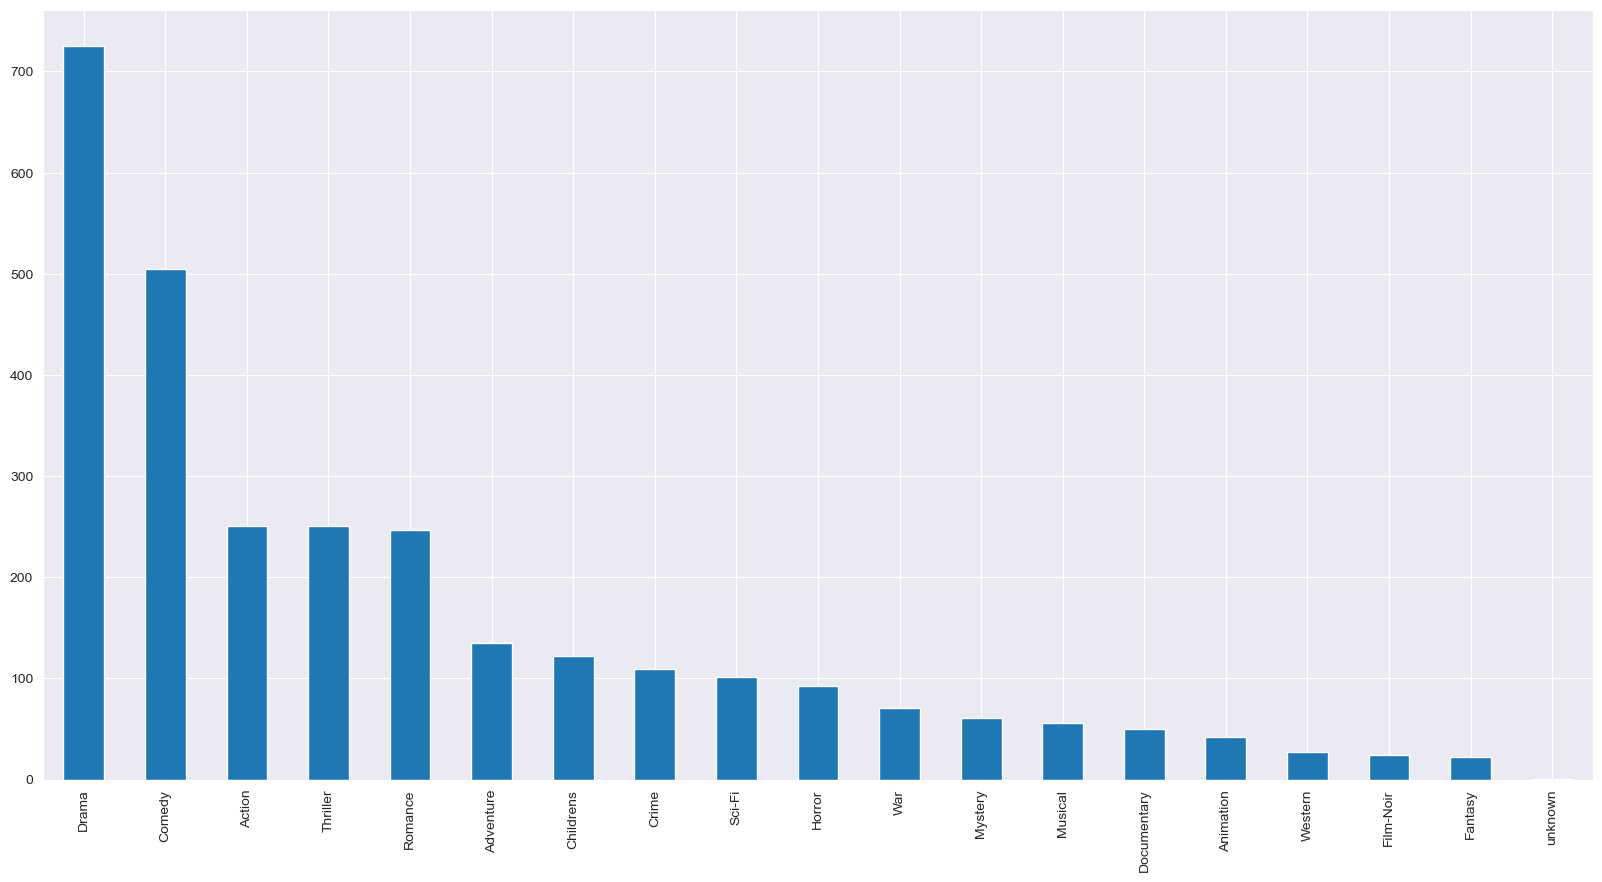

In [168]:
# Visual representation of the sums sorted in descending order
sums_by_genre.sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

**Insights:**
* one movie with unknown genre
* the top 5 genres are Drama, Comedy, Action, Thriller and Romance in descending order
* the bottom 5 genres are Documentary, Animation, Western, Film-Noir and Fantasy in descending order (excluding unknown)


### 5. Drop the movie where the genre is unknown - 2.5 marks

In [177]:
# Create a copy of movie_df 
movie_df_working = movie_df.copy()

In [178]:
#Find movie with unknown genre
movie_df_working[movie_df_working['unknown']!=0]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
#Drop this movie and check the shape to see if no of rows is one less than that in the original movie_df (1681 rows)


movie_df_working.drop(movie_df_working[movie_df_working['unknown']!=0].index, axis=0, inplace=True)
movie_df_working.shape

(1680, 22)

In [180]:
# Since unknown is now not used, we can drop that column too
movie_df_working.drop('unknown', axis=1, inplace=True)
movie_df_working


,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**Insights:**
* 1680 rows left after dropping unknown genre movie
* After dropping the now unused unknown column, we are left with 21 columns in the dataframe of which 18 are genres columns
* The movie dropped which had no genre entries other than unknown is Good Morning released on 4-Feb-1971 with an id of 1373



### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [181]:
#your code here
# filter movie_df_working only for the genre columns and summing over columns by setting axis=1
# also creating a convenience boolean column which is True if the movie has more than one genre and False otherwise
movie_df_working['no_of_genres'] = movie_df_working.iloc[:,3:].sum(axis=1)
movie_df_working['is_multi_genre'] = movie_df_working['no_of_genres'].apply(lambda x: x>1)


In [182]:
movie_df_working.loc[:,['movie title', 'no_of_genres']]

,movie title,no_of_genres
0,Toy Story,3
1,GoldenEye,3
2,Four Rooms,1
3,Get Shorty,3
4,Copycat,3
...,...,...
1676,Mat' i syn,1
1677,B. Monkey,2
1678,Sliding Doors,2
1679,You So Crazy,1


In [183]:
print(f'No of movies with more than one genre: {movie_df_working["is_multi_genre"].sum()}')

No of movies with more than one genre: 849


<AxesSubplot:ylabel='Frequency'>

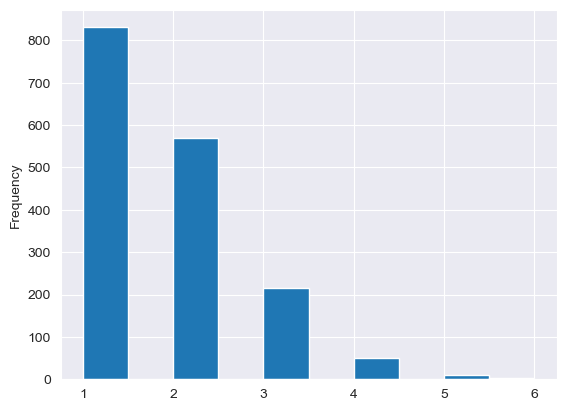

In [184]:
movie_df_working['no_of_genres'].plot(kind='hist')

In [185]:
movie_df_working['no_of_genres'].value_counts()

1    831
2    569
3    215
4     51
5     11
6      3
Name: no_of_genres, dtype: int64

In [186]:
movie_df_working['is_multi_genre'].sum()/ movie_df_working.shape[0]

0.5053571428571428

**Insights:**
* 849 movies with more than one genre (50.5% of total excl movie with unknown genre); of which:
* 569 with 2 genres
* 215 with 3 genres
* 51 with 4
* 11 with 5
* 3 with 6
* 831 movies have only one genre



### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [89]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [187]:
#your code here
#First fix date column by parsing string into datetime objects
movie_df_working['release date'] = movie_df_working['release date'].apply(lambda x: datetime.strptime(x,'%d-%b-%Y'))


In [188]:
#Now extract year as int into another column called 'release_year' as int
movie_df_working['release_year'] = movie_df_working['release date'].apply(lambda x: x.year)
#movie_df_working.release_year = movie_df_working.release_year.astype(int)
movie_df_working.dtypes

movie id                   int64
movie title               object
release date      datetime64[ns]
Action                     int64
Adventure                  int64
Animation                  int64
Childrens                  int64
Comedy                     int64
Crime                      int64
Documentary                int64
Drama                      int64
Fantasy                    int64
Film-Noir                  int64
Horror                     int64
Musical                    int64
Mystery                    int64
Romance                    int64
Sci-Fi                     int64
Thriller                   int64
War                        int64
Western                    int64
no_of_genres               int64
is_multi_genre              bool
release_year               int64
dtype: object

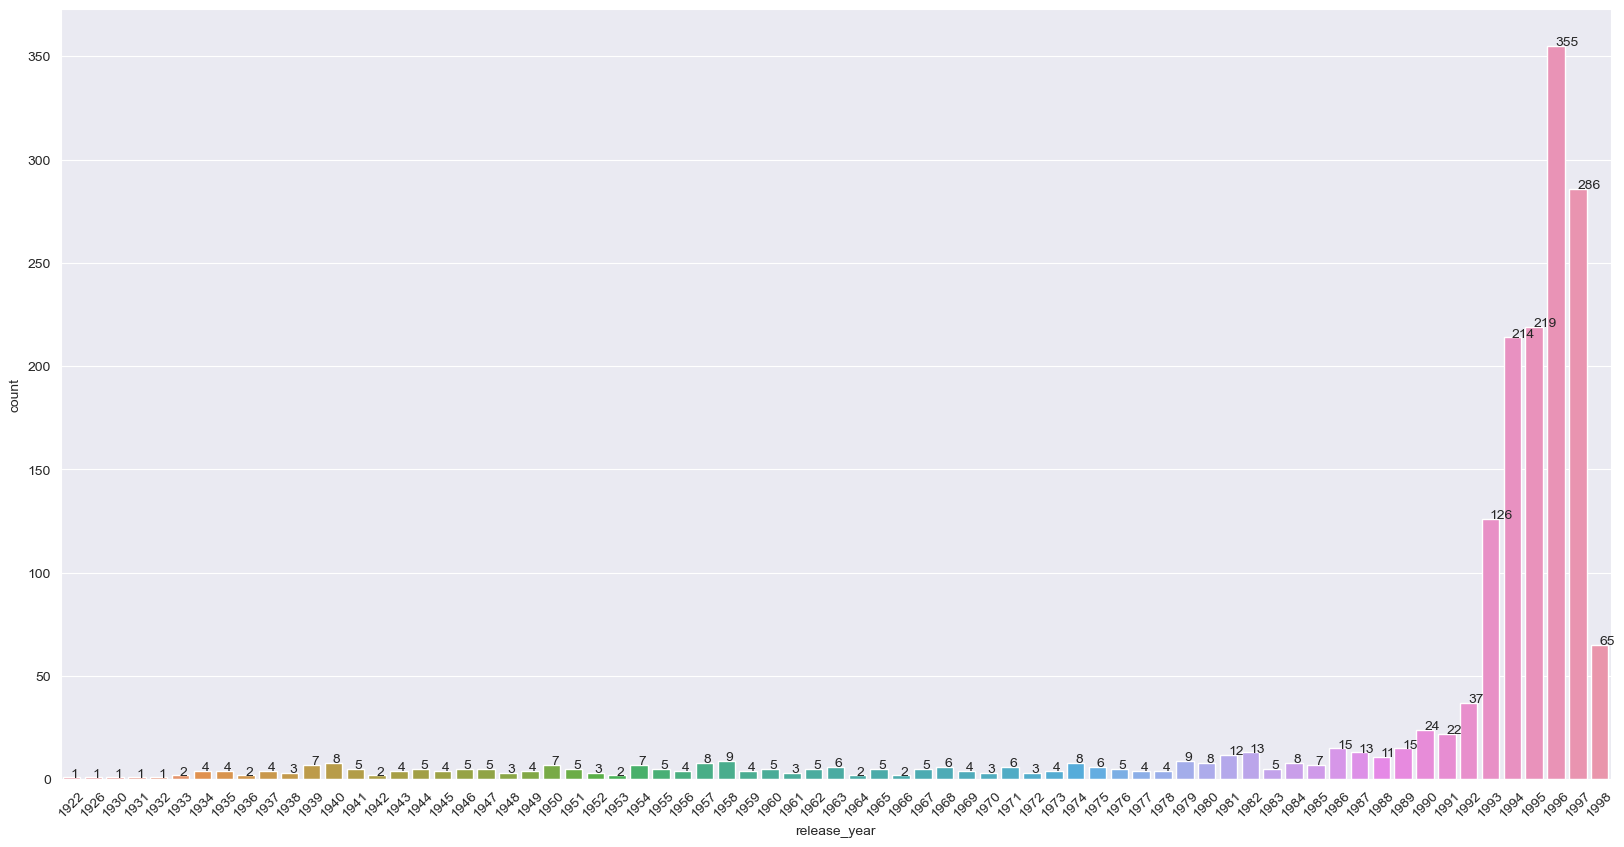

In [214]:
#Univariate plot for release year
# rotating x axis labels to aid legibility
# sorting in ascending order to ensure years read sequentially from left ot right along the x axis

plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
ax = sns.countplot(movie_df_working.release_year.sort_values())

# adding data labels as annotation based on method here: https://stackoverflow.com/questions/49044131/how-to-add-data-labels-to-seaborn-countplot-factorplot/49052124
# releases by year computed using groupby and count and stored in a Series called release
releases_by_year = movie_df_working.groupby('release_year')['movie title'].count()

for p, label in zip(ax.patches, releases_by_year):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))

<AxesSubplot:xlabel='age', ylabel='Density'>

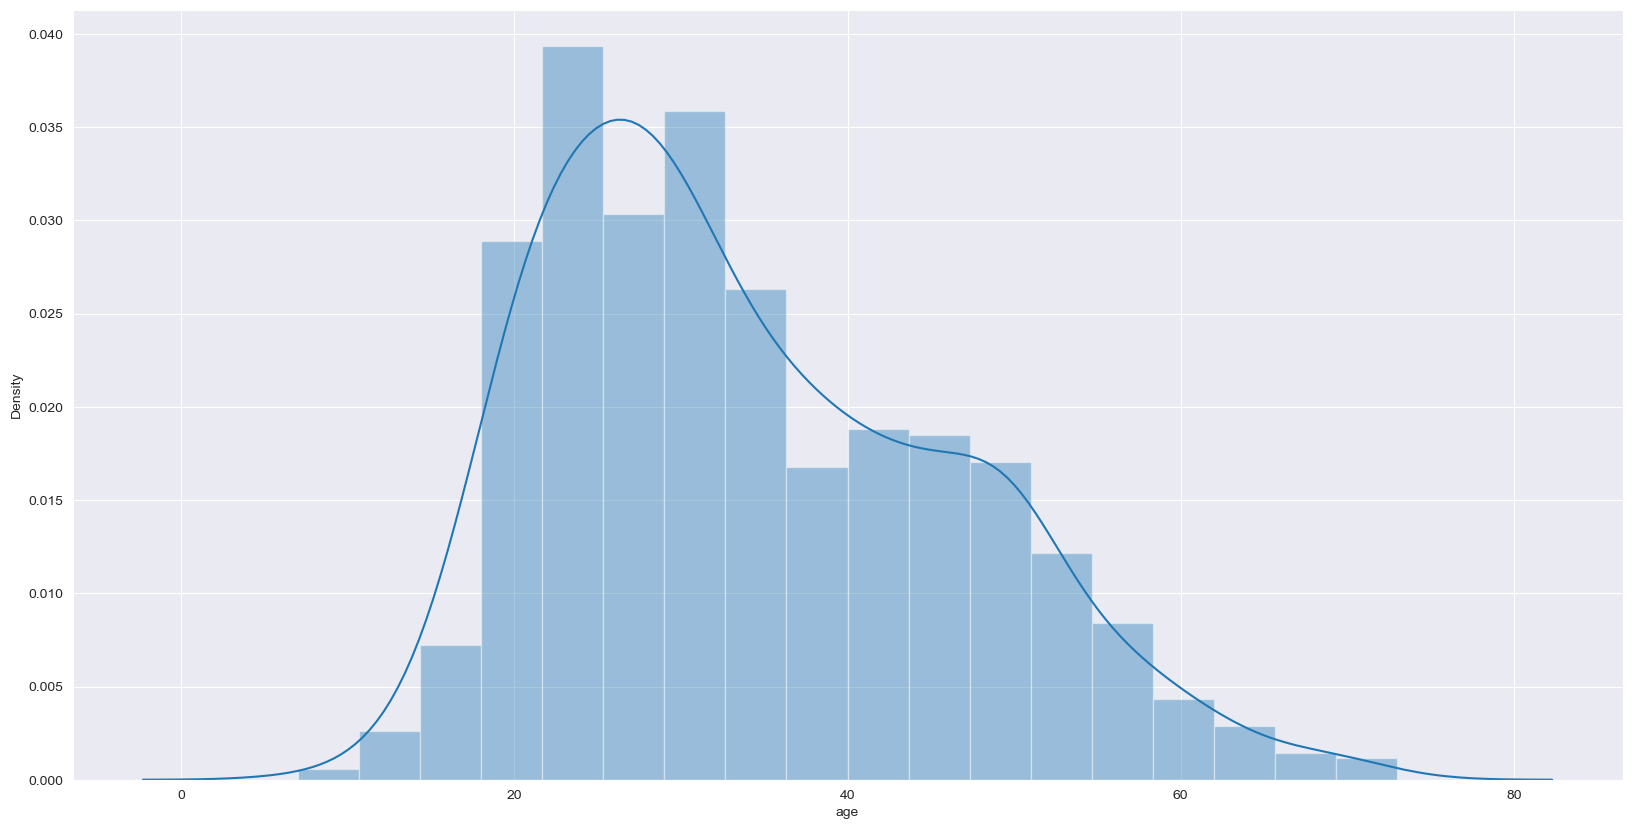

In [200]:
#Univariate plot for age - sorting so as to make x axis read logically from left to right in increasing order of age
# no need for a bins= setting as graph is quite well organised even without a bins setting
plt.figure(figsize=(20, 10))

sns.distplot(user_df.age.sort_values())

<AxesSubplot:xlabel='occupation', ylabel='count'>

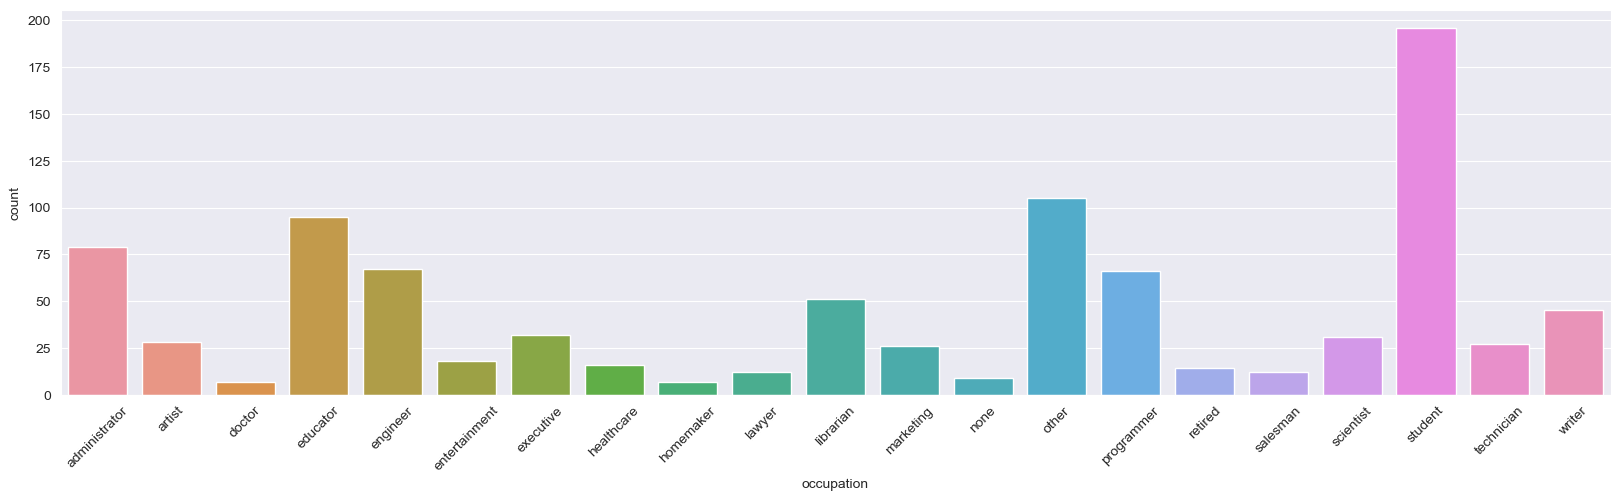

In [201]:
#Univariate plot for occupation
#rotating x axis labels for legibility
#no need for data labels here as the scales are not as widely dispersed as in the case of count by release year
plt.figure(figsize=(20, 5))
plt.xticks(rotation=45)
sns.countplot(user_df.occupation.sort_values())

<AxesSubplot:xlabel='rating', ylabel='count'>

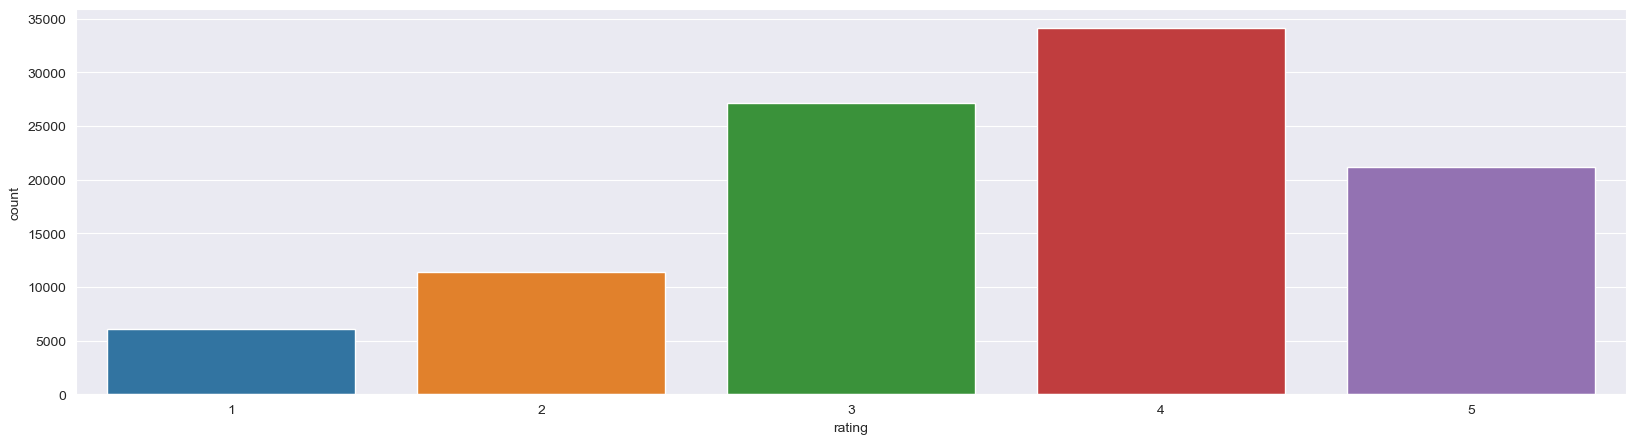

In [202]:
#Univariate plot for rating
#this graph confirms our initial finding that the data is right skewed
plt.figure(figsize=(20, 5))
sns.countplot(rating_df.rating.sort_values())

<AxesSubplot:xlabel='gender', ylabel='count'>

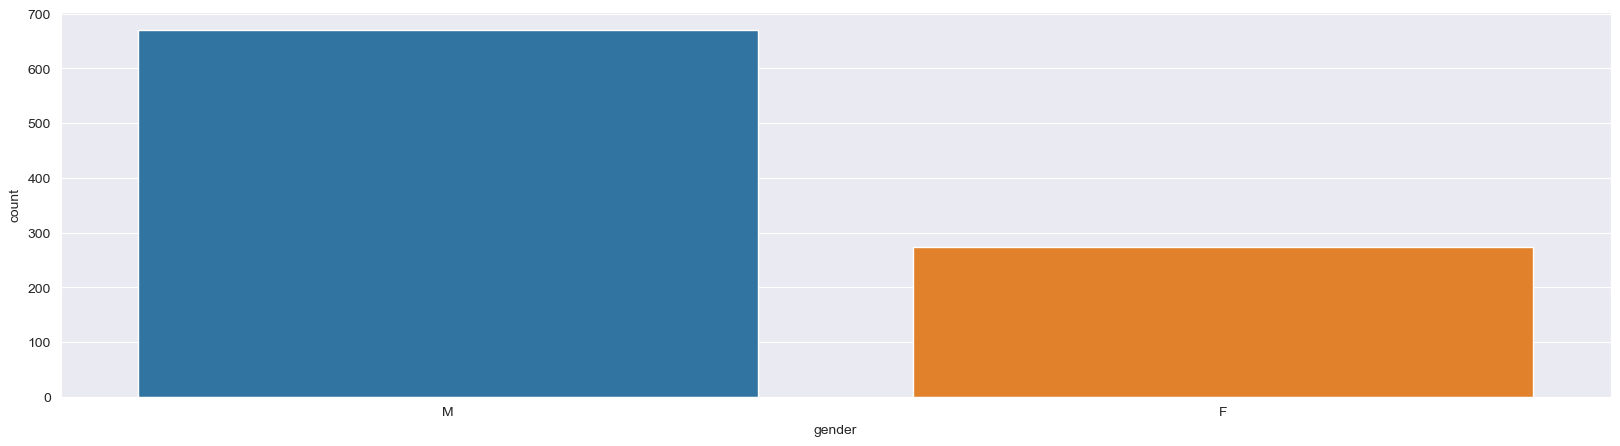

In [96]:
#Univariate plot for gender
plt.figure(figsize=(20, 5))
sns.countplot(user_df.gender)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

In [219]:
#your code here
#first filter movie_df_working to include only genre columns (using an alternate method as I'd lost track column nos by this point)
#then perform a groupby on 'release_year' and sum() on that and store that in genres_by_year_df

genres_by_year_df = movie_df_working.loc[:,~movie_df_working.columns.isin(['movie id', 'no_of_genres', 'is_multi_genre'])].groupby('release_year').sum()
genres_by_year_df

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


In [212]:
# sample check for random entry in resultant df above which works as the entry above is 6 for the conditions as below and when we filter for those conditions we get 6 rows
movie_df_working[(movie_df_working.release_year==1995) & (movie_df_working.Animation!=0)]

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,no_of_genres,is_multi_genre,release_year
0,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,3,True,1995
540,542,Pocahontas,1995-01-01,0,0,1,1,0,0,0,...,1,0,1,0,0,0,0,4,True,1995
1064,1066,Balto,1995-01-01,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,2,True,1995
1217,1219,"Goofy Movie, A",1995-01-01,0,0,1,1,1,0,0,...,0,0,1,0,0,0,0,4,True,1995
1410,1412,Land Before Time III: The Time of the Great Gi...,1995-01-01,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,2,True,1995
1468,1470,Gumby: The Movie,1995-01-01,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,2,True,1995


In [249]:
#for each column in the genres_by_year_df, create a column in a new df which divides that by releases_by_year to arrive at percentage 

popularity_df = genres_by_year_df.div(releases_by_year, axis = 0) * 100

popularity_df

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,
1922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1931,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
1932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,14.018692,6.074766,1.869159,7.009346,38.317757,3.738318,4.205607,45.327103,1.401869,0.000000,3.738318,0.934579,0.934579,16.355140,3.271028,11.682243,3.271028,2.803738
1995,18.264840,10.045662,2.739726,9.589041,28.767123,5.022831,2.283105,40.639269,1.369863,0.456621,6.392694,1.369863,2.283105,16.894977,6.849315,17.808219,2.283105,0.913242
1996,12.394366,6.760563,2.535211,5.915493,30.422535,5.915493,5.070423,47.887324,1.690141,0.281690,3.098592,2.535211,1.690141,10.704225,4.225352,13.239437,2.535211,0.563380


<AxesSubplot:xlabel='release_year'>

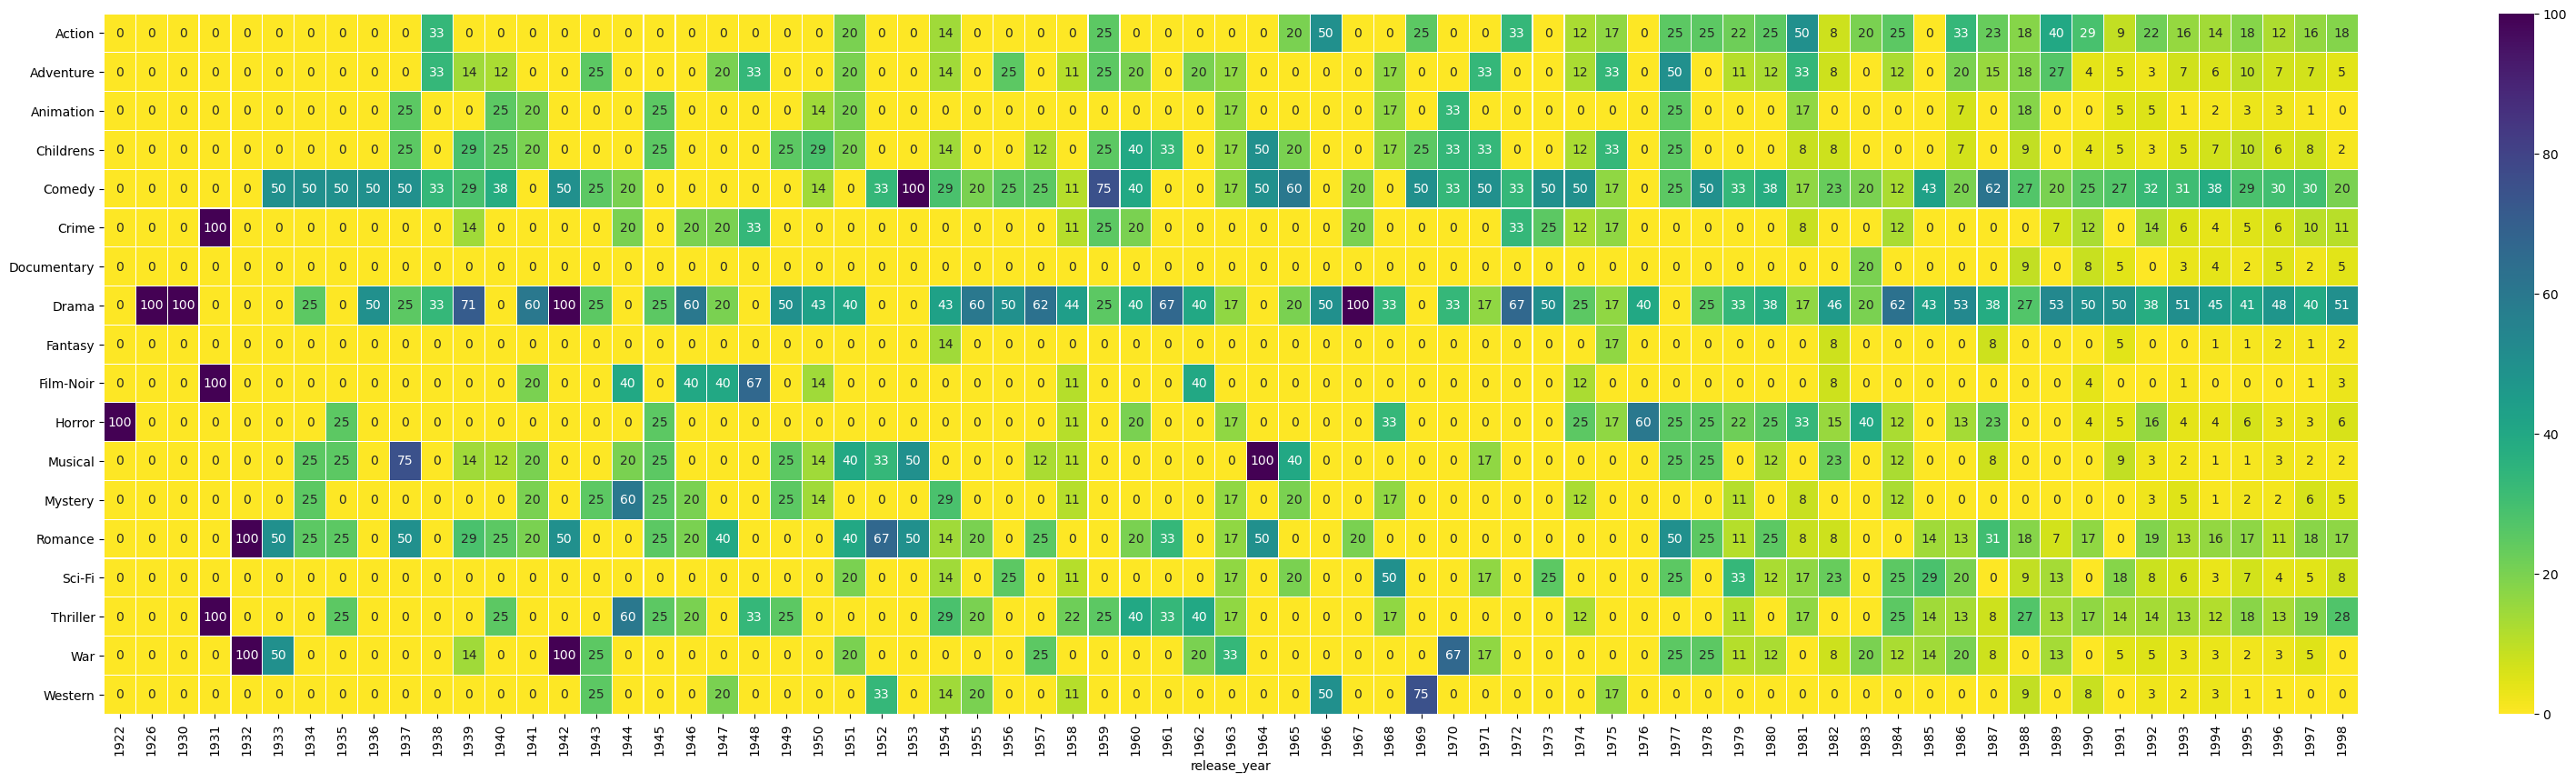

In [251]:
#Using sns.heatmap as visualisation 
#I transpose the result DF so that the heatmap is easier to see without scrolling 
#using viridis reversed (viridis_r palette), linecolor and linewidths to set a grid and annotations with 2 decimals
plt.figure(figsize=(40,10))
plt.xticks(rotation=45)
sns.heatmap(popularity_df.T, cmap='viridis_r', linecolor='w', linewidths=0.1, annot=True, fmt='.0f')

In [253]:
# note that this approach creates a situation where the total percentages over a year will be more than 100% in some instances as movies can have more than one genre
# I depict an alternate approach as below where the total percentage for a year will be 1 and may be more suitable for a heatmap as it may be confusing to see 100 in years where other cells also have non zero, +ve values
genres_sum = genres_by_year_df.sum(axis=1)

popularity_df2 = genres_by_year_df.div(genres_sum, axis=0) * 100

popularity_df2

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,
1922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1931,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000
1932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,8.498584,3.682720,1.133144,4.249292,23.229462,2.266289,2.549575,27.478754,0.849858,0.000000,2.266289,0.566572,0.566572,9.915014,1.983003,7.082153,1.983003,1.699717
1995,10.498688,5.774278,1.574803,5.511811,16.535433,2.887139,1.312336,23.359580,0.787402,0.262467,3.674541,0.787402,1.312336,9.711286,3.937008,10.236220,1.312336,0.524934
1996,7.871199,4.293381,1.610018,3.756708,19.320215,3.756708,3.220036,30.411449,1.073345,0.178891,1.967800,1.610018,1.073345,6.797853,2.683363,8.407871,1.610018,0.357782


In [254]:
popularity_df2.sum(axis=1).value_counts()

100.0    37
100.0    12
100.0    12
100.0     9
100.0     1
dtype: int64

<AxesSubplot:xlabel='release_year'>

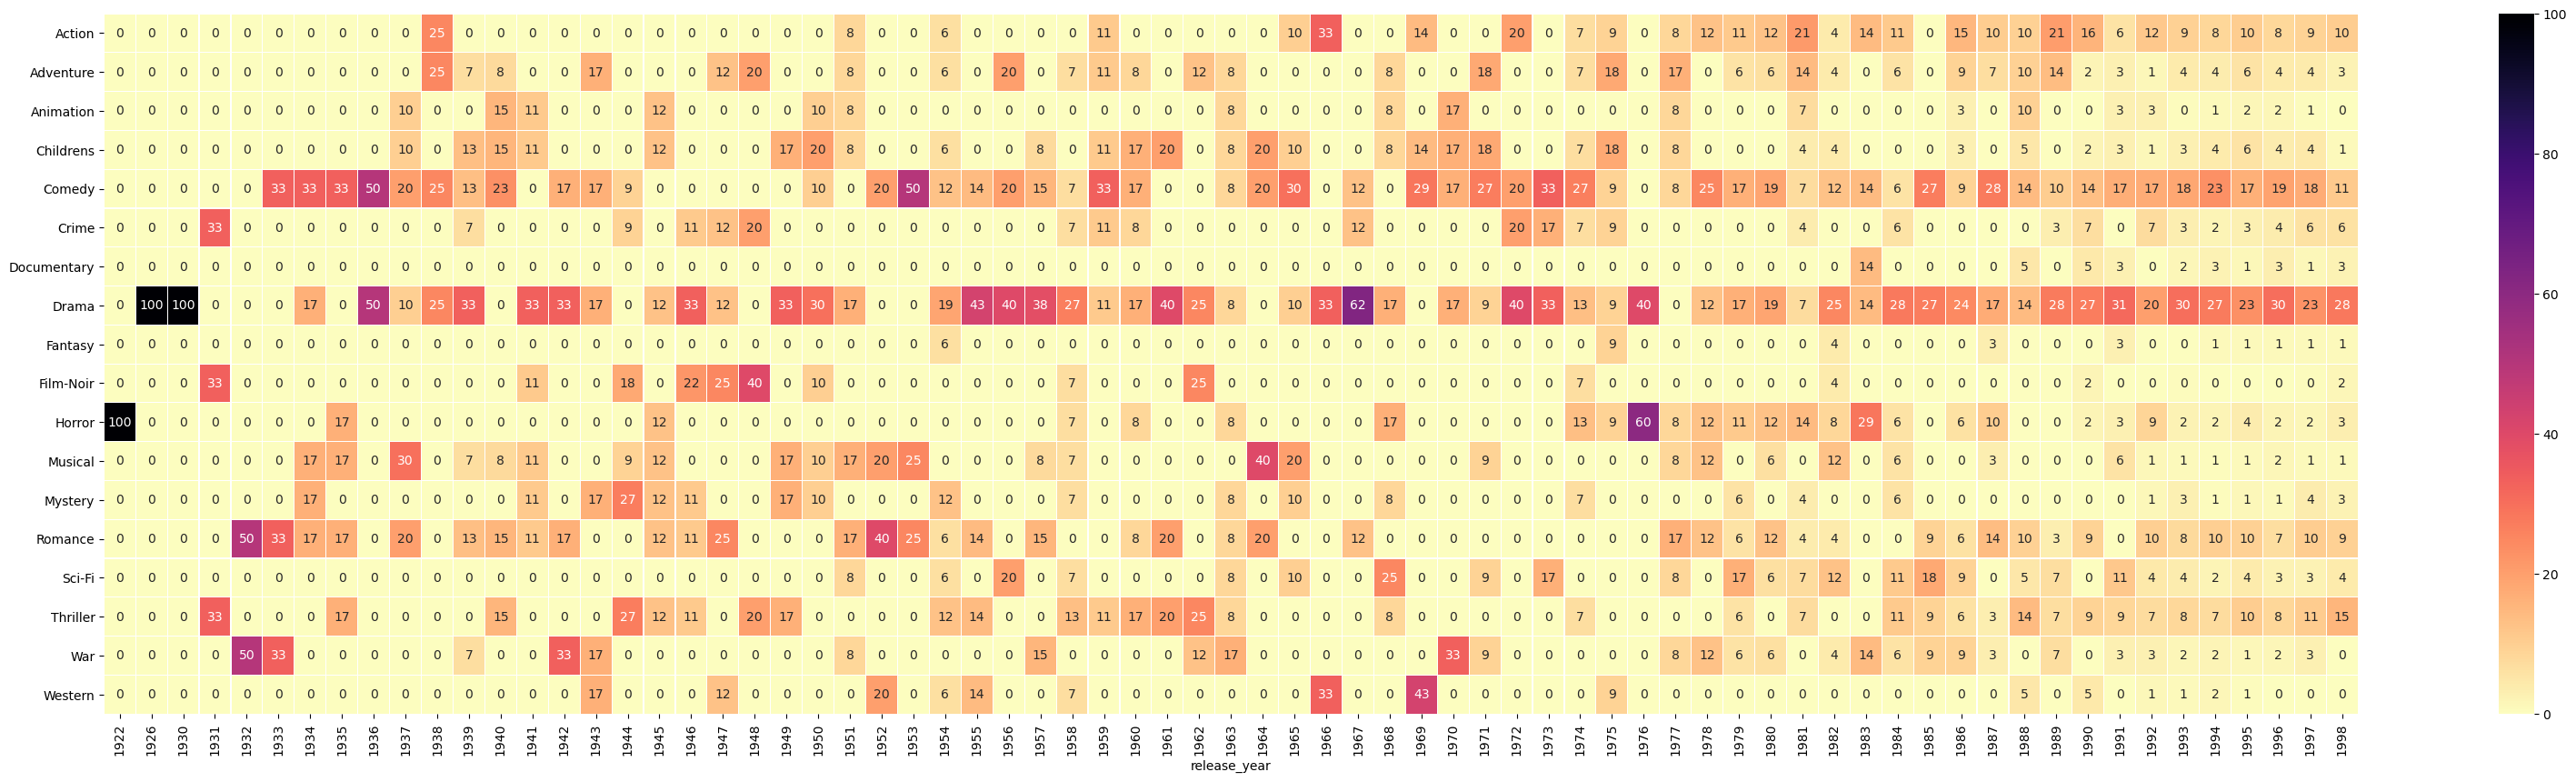

In [255]:
#Using sns.heatmap as visualisation 
#I transpose the result DF so that the heatmap is easier to see without scrolling 
#using magma reversed (magma_r palette), linecolor and linewidths to set a grid and annotations with 2 decimals
plt.figure(figsize=(40,10))
plt.xticks(rotation=45)
sns.heatmap(popularity_df2.T, cmap='magma_r', linecolor='w', linewidths=0.1, annot=True, fmt='.0f')

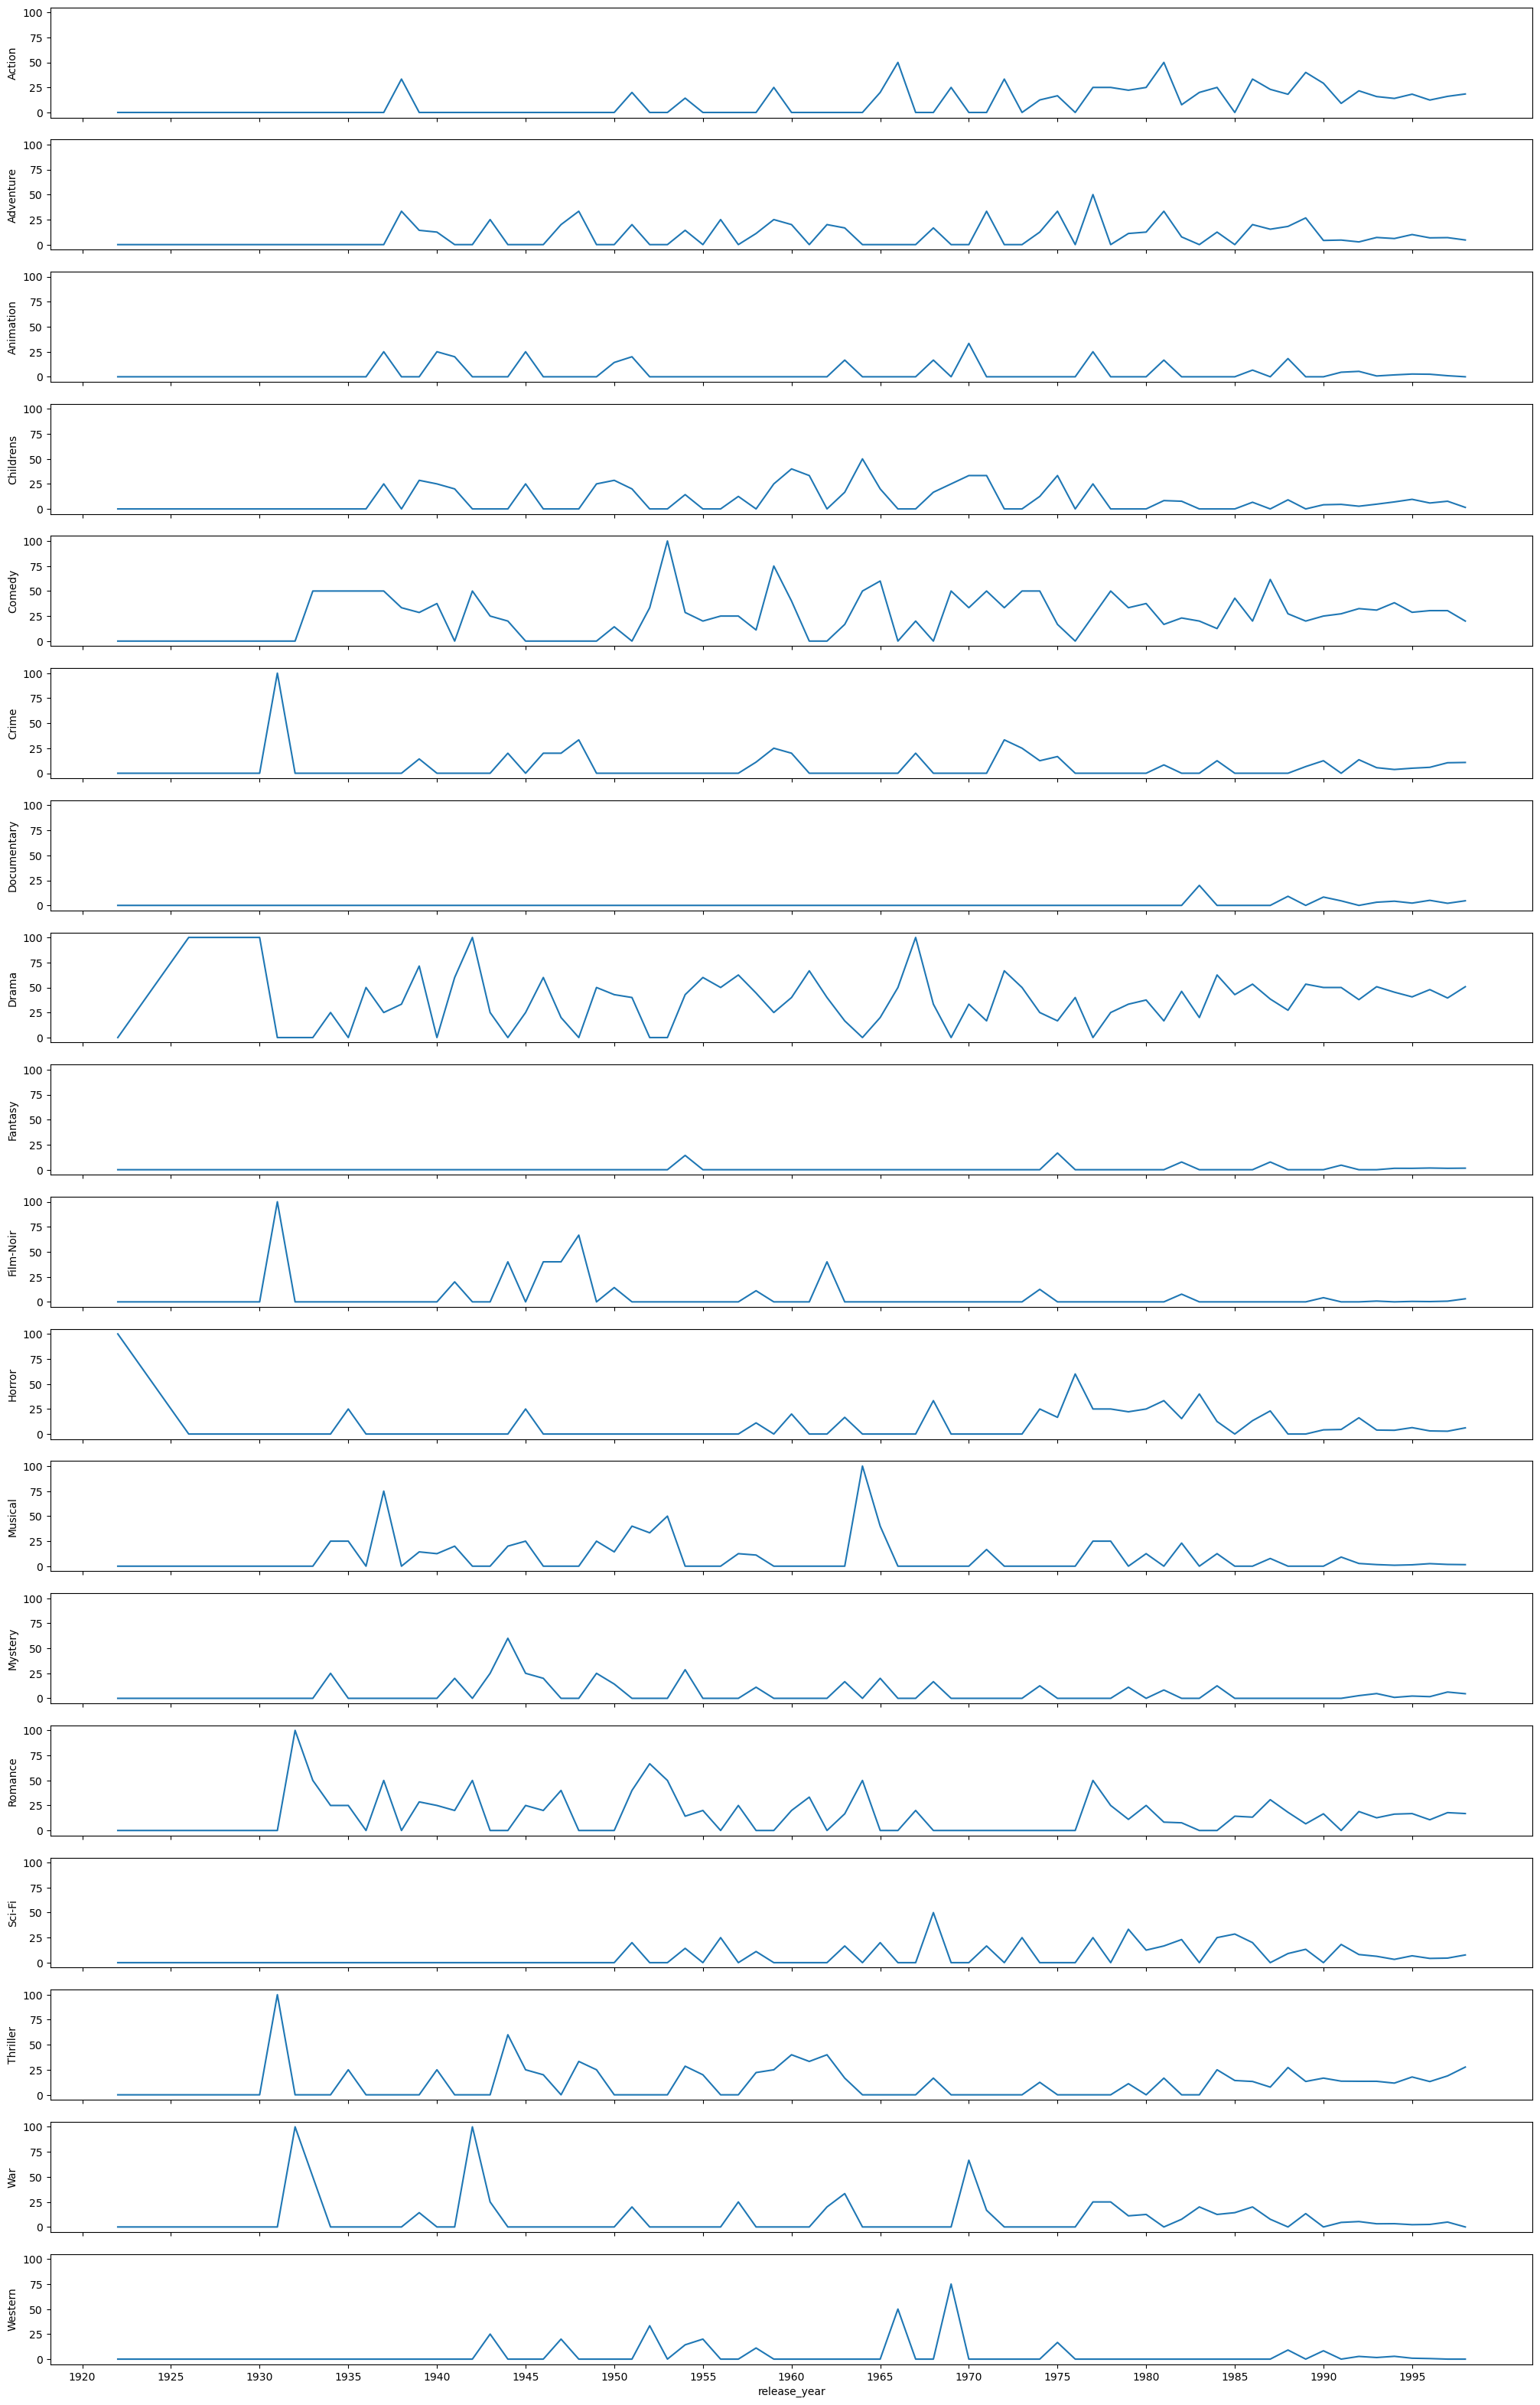

In [256]:
#This visualisation is helpful too - helps to see temporal trends for each genre in isolation
#as before one can use popularity_df2 but the trends are the same 

fig, axes = plt.subplots(popularity_df.columns.size, 1, figsize=(25, 40), sharex=True, sharey=True)
plt.xticks(np.arange(1920,2000,5))
#plt.yticks(np.arange(0,1.25,0.25))
for i, column in enumerate(popularity_df.columns):
    #print(i)
    sns.lineplot(ax=axes[i], data=popularity_df[column])


**Insights:**
* Drama remains a popular genre across years - others are Comedy, Romance, Thriller and Action (looking at rows that are towards green scale on the heatmap)
* As the number of movies released rises sharply in the 90s, the popularity skew towards any one genre is reduced and the distribution of movies across genres is more uniform
* The initial few years have very few movie releases and it's not possible to impute a trend from those years due to lack of data points
* The volatility of popularity for any one genre reduces - the line charts for each genre smoothens out as we approach the 1990s


### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [257]:
#your code here
# First merge movie_df_working with rating_df on 'movie id'
movie_rating_merged_df = movie_df_working.merge(rating_df, on='movie id')
movie_rating_merged_df

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Sci-Fi,Thriller,War,Western,no_of_genres,is_multi_genre,release_year,user id,rating,timestamp
0,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,...,0,0,0,0,3,True,1995,308,4,887736532
1,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,...,0,0,0,0,3,True,1995,287,5,875334088
2,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,...,0,0,0,0,3,True,1995,148,4,877019411
3,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,...,0,0,0,0,3,True,1995,280,4,891700426
4,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,...,0,0,0,0,3,True,1995,66,3,883601324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,1678,Mat' i syn,1998-02-06,0,0,0,0,0,0,0,...,0,0,0,0,1,False,1998,863,1,889289570
99986,1679,B. Monkey,1998-02-06,0,0,0,0,0,0,0,...,0,1,0,0,2,True,1998,863,3,889289491
99987,1680,Sliding Doors,1998-01-01,0,0,0,0,0,0,0,...,0,0,0,0,2,True,1998,863,2,889289570
99988,1681,You So Crazy,1994-01-01,0,0,0,0,1,0,0,...,0,0,0,0,1,False,1994,896,3,887160722


In [258]:
#First create rating_summary_df by applying count on the movie_rating_merged_df groupby on 'movie id' and only select the first column since others are redundant for now
rating_summary_df = pd.DataFrame(movie_rating_merged_df.groupby('movie id').count().iloc[:,1])

#rename the first column of this new df to something more appropriate
rating_summary_df.columns = ['count_of_ratings']

#create a new column of avg rating by applying mean on the movie_rating_merged_df groupby on 'movie id' and selecting the 'rating' column from the resultant df
rating_summary_df['avg_rating'] = movie_rating_merged_df.groupby('movie id')['rating'].mean()

#Now merge rating_summary_df with movie_rating_merged_df (only first two columns - movie id to use as merge on and movie title as relevant data)
#I also drop duplicates from movie-rating_merged_df  
#rating_summary index has the movie id's so we use left_index=True
#the other df has movie id in a column so we use right_on=
rating_summary_df = rating_summary_df.merge(movie_rating_merged_df.iloc[:,:2].drop_duplicates(subset='movie id'), left_index=True, right_on='movie id', how='left')


In [259]:
#first filter rating_summary_df for rows where count_of_ratings >=100
#Then sort this by avg_rating in descending order and select first 25 rows from this list
top25_df = rating_summary_df[rating_summary_df.count_of_ratings >= 100].sort_values('avg_rating', ascending= False).iloc[:25,:]
top25_df

,count_of_ratings,avg_rating,movie id,movie title
57062,112,4.491071,408,"Close Shave, A"
49322,298,4.466443,318,Schindler's List
23553,118,4.466102,169,"Wrong Trousers, The"
64250,243,4.456790,483,Casablanca
8562,283,4.445230,64,"Shawshank Redemption, The"
73360,209,4.387560,603,Rear Window
2229,267,4.385768,12,"Usual Suspects, The"
6402,583,4.358491,50,Star Wars
25597,125,4.344000,178,12 Angry Men
19022,198,4.292929,134,Citizen Kane


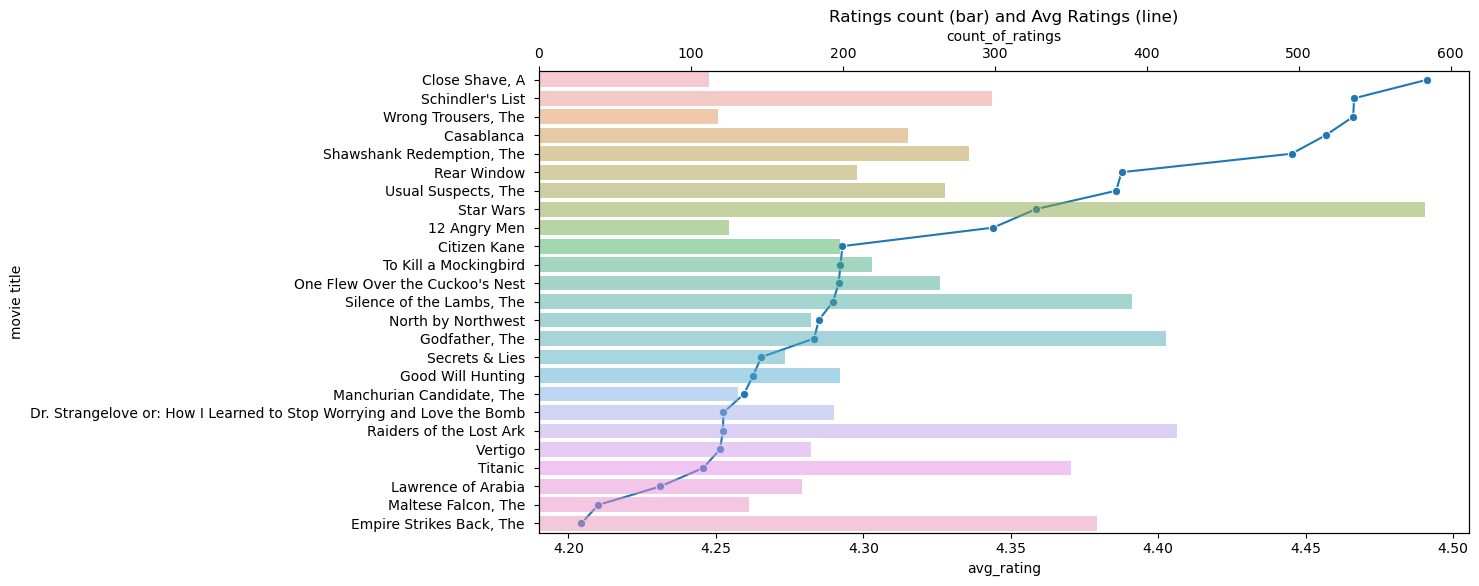

In [260]:
# here is a nice visualisation of the top 25 
# removing sns style as grids for the two x axes create confusion

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data =top25_df, y='movie title', x='avg_rating', marker='o', sort = False, ax=ax1)
ax2 = ax1.twiny()

sns.barplot(data = top25_df, y='movie title', x='count_of_ratings', alpha=0.5, ax=ax2).set_title('Ratings count (bar) and Avg Ratings (line)');


### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [261]:
#your code here
#create the merge of all 3 datasets
mega_merge_df = movie_rating_merged_df.merge(user_df,on='user id')
mega_merge_df

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,no_of_genres,is_multi_genre,release_year,user id,rating,timestamp,age,gender,occupation,zip code
0,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,...,3,True,1995,308,4,887736532,60,M,retired,95076
1,4,Get Shorty,1995-01-01,1,0,0,0,1,0,0,...,3,True,1995,308,5,887737890,60,M,retired,95076
2,5,Copycat,1995-01-01,0,0,0,0,0,1,0,...,3,True,1995,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys,1995-01-01,0,0,0,0,0,0,0,...,2,True,1995,308,4,887738847,60,M,retired,95076
4,8,Babe,1995-01-01,0,0,0,1,1,0,0,...,3,True,1995,308,5,887736696,60,M,retired,95076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,748,"Saint, The",1997-03-14,1,0,0,0,0,0,0,...,3,True,1997,729,4,893286638,19,M,student,56567
99986,751,Tomorrow Never Dies,1997-01-01,1,0,0,0,0,0,0,...,3,True,1997,729,3,893286338,19,M,student,56567
99987,879,"Peacemaker, The",1997-01-01,1,0,0,0,0,0,0,...,3,True,1997,729,3,893286299,19,M,student,56567
99988,894,Home Alone 3,1997-01-01,0,0,0,1,1,0,0,...,2,True,1997,729,1,893286511,19,M,student,56567


In [262]:
# No of total ratings by gender
# perform groupby on gender then filter by any one column
# store result in a new df and rename column to appropriate title

ratings_by_gender_df = pd.DataFrame(mega_merge_df.groupby('gender').count()['movie title'])
ratings_by_gender_df.columns = ['total_ratings']
ratings_by_gender_df

,total_ratings
gender,
F,25738
M,74252


In [263]:
# filter mega_merge_df where there is a Drama rating and then groupby gender and count
# input this into a column called drama_ratings in ratings_by_gender_df

ratings_by_gender_df['drama_ratings'] = mega_merge_df[mega_merge_df.Drama==1].groupby('gender').count()['movie title']
ratings_by_gender_df

,total_ratings,drama_ratings
gender,,
F,25738,11008
M,74252,28887


In [264]:
# filter mega_merge_df where there is a Sci-Fi rating and then groupby gender and count
# input this into a column called sci-fi_ratings in ratings_by_gender_df

ratings_by_gender_df['sci-fi_ratings'] = mega_merge_df[mega_merge_df['Sci-Fi']==1].groupby('gender').count()['movie title']
ratings_by_gender_df

,total_ratings,drama_ratings,sci-fi_ratings
gender,,,
F,25738,11008,2629
M,74252,28887,10101


In [265]:
# filter mega_merge_df where there is a Romance rating and then groupby gender and count
# input this into a column called romance_ratings in ratings_by_gender_df

ratings_by_gender_df['romance_ratings'] = mega_merge_df[mega_merge_df['Romance']==1].groupby('gender').count()['movie title']
ratings_by_gender_df

,total_ratings,drama_ratings,sci-fi_ratings,romance_ratings
gender,,,,
F,25738,11008,2629,5858
M,74252,28887,10101,13603


In [266]:
# Loop through the three columns just created and create new columns for percentage of rating for that genre / total ratings 

for column in ratings_by_gender_df.columns[1:4]:
    ratings_by_gender_df[column.split('_')[0]+'_pc'] = ratings_by_gender_df[column]/ratings_by_gender_df.total_ratings

In [267]:
# Quick visual check of just total ratings and percentages of the three genres under consideration

ratings_by_gender_df.iloc[:,np.r_[0,4:7]]

,total_ratings,drama_pc,sci-fi_pc,romance_pc
gender,,,,
F,25738,0.427694,0.102145,0.227601
M,74252,0.389040,0.136037,0.183200


<AxesSubplot:>

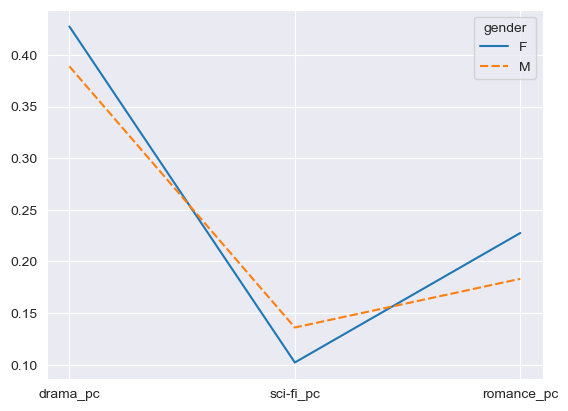

In [268]:
# output the percentages visually, first filter the percentages columns into a new dataframe and use sns.lineplot
# reset sns style to darkgrid as was changed for the chart in section 9

df_chart = ratings_by_gender_df.iloc[:,4:7]
df_chart.T

sns.set_style(style='darkgrid')
sns.lineplot(data=df_chart.T)

**Conclusion:**
    


* Q. Men watch more drama than women
* *Answer: No not true. 42.77% of women watch drama vs. 38.90% of men*
* Q. Women watch more Sci-Fi than men
* *Answer: Not true. 10.21% of women watch Sci-Fi vs. 13.60% of men*
* Q. Men watch more Romance than women
* *Answer: Not true. 22.76% of women watch Romance vs. 18.32% of men*